# K-means Clustering Algorithm

You will implement the K-means unsupervised learning algorithm.

Use the simplified Iris dataset provided to test your code.

Column 1: sepal length.
Column 2: sepal width   


In [1]:
import numpy as np
import pandas as pd
from copy import deepcopy
from matplotlib import pyplot as plt


In [2]:
# Ploting clustering results in colors
def plot_clusters(X, clusters, centroids):
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    k,_ = np.shape(centroids)

    fig, ax = plt.subplots()
    for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        plt.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])

    plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=150, c='y')

# K-means algorithm

In [3]:
# To simplify the implementation, hard-code the number of clusters to 2

def kmeans(X):
  k=2
  N = len(X)
  ctr1 = X[(np.random.randint(0,N)),:]   # Randomly select initial centroid 1
  ctr2 = X[(np.random.randint(0,N)),:]   # Randomly select initial centroid 2

  centroids = np.array(list(zip(ctr1, ctr2)), dtype=np.float32)  # Create an array of centroids for each cluster
  clusters = np.zeros(len(X))   # Initialize the clusters

  MAX_ITR = 100   # Define the maximum number of iterations
  update = deepcopy(centroids)   # Deep copy the centroids array to update it later

  for itr in range(MAX_ITR):
    sum0 , sum1 = np.zeros(2) , np.zeros(2)
    count0 , count1 = 0 , 0
    for i in range(len(X)):
      # To-do: calculate the distances of X[i] to two cluster centers 
      dist0 = np.linalg.norm(X[i] - centroids[0])
      dist1 = np.linalg.norm(X[i] - centroids[1])
      if dist0 < dist1:# To-do: compare the distances
            # Step 1: Assing each data point to the closest cluster
            # To-do: Assign the data point to cluster 0
            clusters[i] = 0
            # Step 2: Cluster-center update
            # To-do: Sum up all data points assigned to cluster 0
            sum0 += X[i]
            count0 += 1
      else:
        # Step 1: Assing each data point to the closest cluster
        # To-do: Assign the data point to cluster 1
        clusters[i] = 1
        # Step 2: Cluster-center update
        # To-do: Assign the data point to cluster 1
        sum1 += X[i]
        count1 += 1
    update[0][0] = sum0[0]/count0   # Calculate the new centroid for cluster 0
    update[0][1] = sum0[1]/count0
    update[1][0] = sum1[0]/count1   # Calculate the new centroid for cluster 1
    update[1][1] = sum1[1]/count1

    # To-do: implement the early stop criterion via comparing centroids and updates. 
    # if centroids and updates are the same, it means no new membership changes, then we can stop
    if np.array_equal(centroids, update):
        break
    else:
        centroids = deepcopy(update)
    # if centroids and updates are different, we need to change the centroids. 

  print('Algorithm converges after {} iterations'. format(itr))   # Print the number of iterations taken to converge
  return clusters, centroids   # Return the cluster assignments and centroids

Algorithm converges after 6 iterations


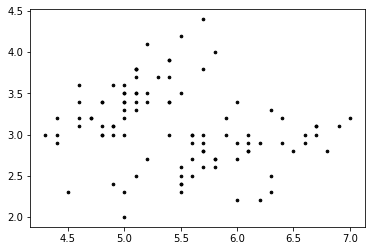

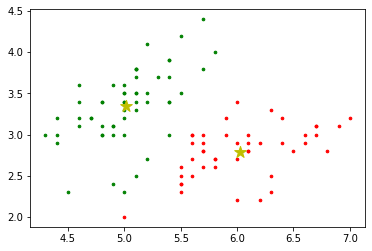

In [4]:
# Load dataset and plot it
df = pd.read_csv("simple_iris_dataset.csv")

df1 = df['sepal_length'].values
df2 = df['sepal_width'].values
X = np.array(list(zip(df1, df2)))   # 100 x 2
plt.scatter(df1, df2, c='black', s=7)
# print(X.shape)

# Call the function to find the clusters and centroids
clusters, centroids = kmeans(X)   

# Plot the clusters and centroids
plot_clusters(X, clusters, centroids)   
